#üìå Extrac√£o

In [1]:
import pandas as pd
import json
from google.colab import drive

# 1. Montar o Google Drive
drive.mount('/content/drive')

# 2. O caminho para o arquivo no Google Drive
caminho_do_arquivo = "/content/drive/MyDrive/TelecomX_Data.json"

# Carregar JSON
with open(caminho_do_arquivo, "r") as f:
    data = json.load(f)

# Normalizar JSON em DataFrame
df = pd.json_normalize(data)

# Ver primeiras linhas
print("üìå Primeiras linhas do dataset:")
display(df.head())

# Info do dataset
print("\nüìå Informa√ß√µes gerais:")
print(df.info())


Mounted at /content/drive
üìå Primeiras linhas do dataset:


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]


üìå Informa√ß√µes gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport

#üîß Transforma√ß√£o

In [6]:
# Padronizar coluna churn (1 = saiu, 0 = ficou)
df["Churn"] = pd.to_numeric(df["Churn"].replace({"Yes":1, "No":0}), errors="coerce")

# Converter valores num√©ricos
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Criar coluna de contas di√°rias
df["Contas_Diarias"] = df["account.Charges.Monthly"] / 30

# Tratar valores nulos (para as colunas 'account.Charges.Total' e 'Churn')
df.fillna(0, inplace=True)

# Conferir resultado
df.head()

customerID  Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    0.0          Female                       0              Yes   
1  0003-MKNFE    0.0            Male                       0               No   
2  0004-TLHLJ    1.0            Male                       0               No   
3  0011-IGKFF    1.0            Male                       1              Yes   
4  0013-EXCHZ    1.0          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  Contas_Diarias  
0                    65.6                593.30        2.186667  
1                    59.9                542.40        1.996667  
2                    73.9                280.85        2.463333  
3                    98.0               1237.85        3.266667  
4                    83.9                267.40        2.796667  

[5 rows x 22 columns]

#üìä Carga e an√°lise

 Estat√≠sticas Descritivas:


account.Charges.Monthly  account.Charges.Total  Contas_Diarias
count              7267.000000            7267.000000     7267.000000
mean                 64.720098            2277.182035        2.157337
std                  30.129572            2268.648587        1.004319
min                  18.250000               0.000000        0.608333
25%                  35.425000             396.200000        1.180833
50%                  70.300000            1389.200000        2.343333
75%                  89.875000            3778.525000        2.995833
max                 118.750000            8684.800000        3.958333

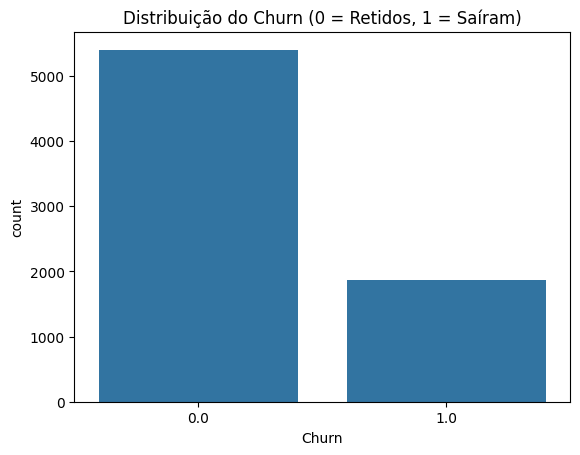

üìå Taxa de churn: 25.72 %


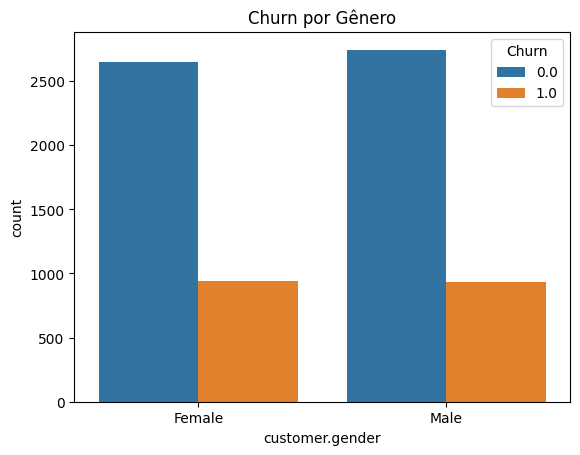

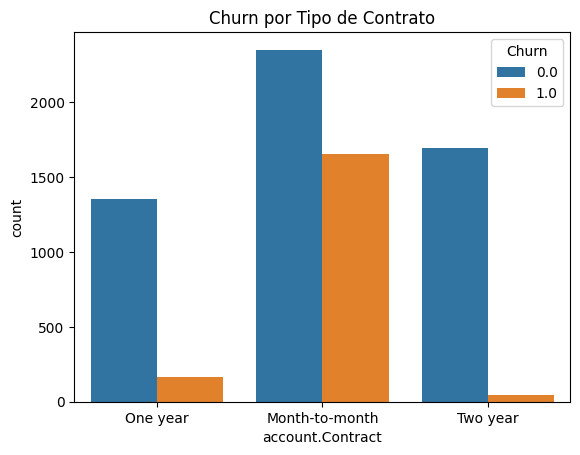

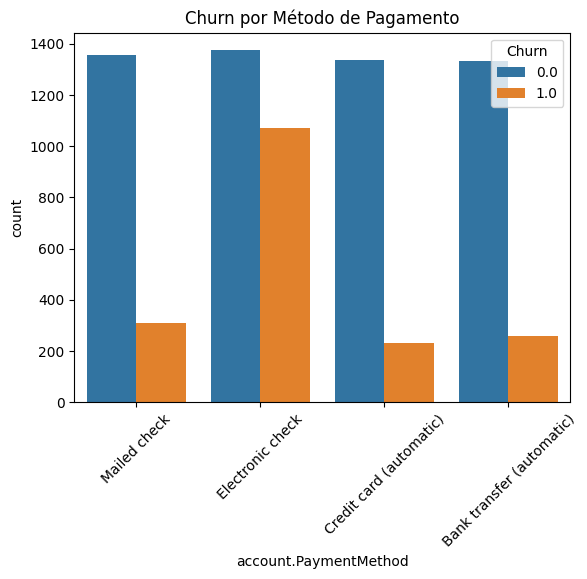

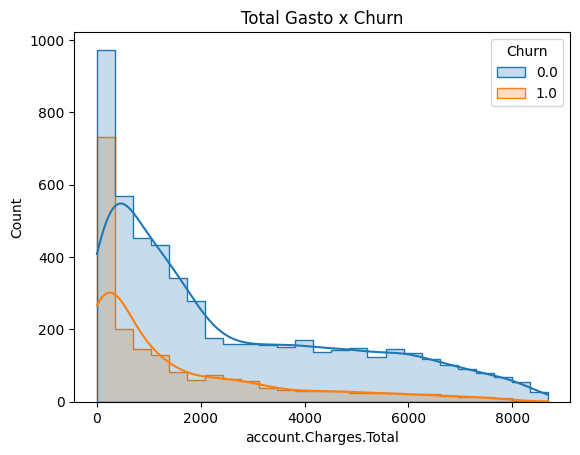

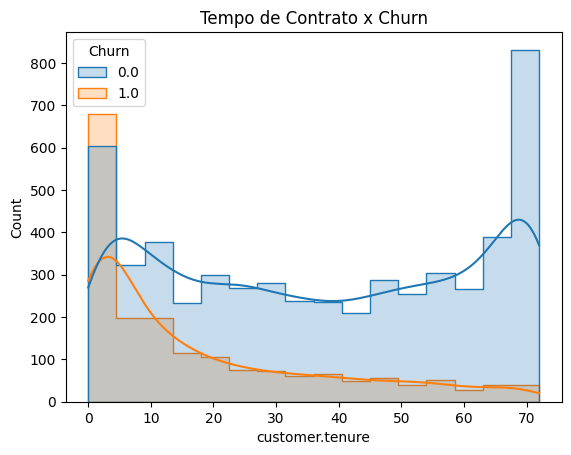

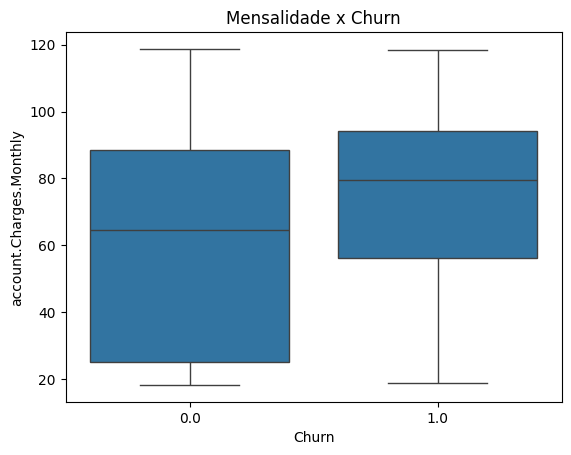

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estat√≠sticas descritivas ---
print(" Estat√≠sticas Descritivas:")
display(df[["account.Charges.Monthly","account.Charges.Total","Contas_Diarias"]].describe())

# --- Distribui√ß√£o do Churn ---
sns.countplot(x="Churn", data=df)
plt.title("Distribui√ß√£o do Churn (0 = Retidos, 1 = Sa√≠ram)")
plt.show()

print(f"üìå Taxa de churn: {round(df['Churn'].mean()*100,2)} %")

# --- Churn por vari√°veis categ√≥ricas ---
sns.countplot(x="customer.gender", hue="Churn", data=df)
plt.title("Churn por G√™nero")
plt.show()

sns.countplot(x="account.Contract", hue="Churn", data=df)
plt.title("Churn por Tipo de Contrato")
plt.show()

sns.countplot(x="account.PaymentMethod", hue="Churn", data=df)
plt.title("Churn por M√©todo de Pagamento")
plt.xticks(rotation=45)
plt.show()

# --- Churn por vari√°veis num√©ricas ---
sns.histplot(data=df, x="account.Charges.Total", hue="Churn", kde=True, element="step")
plt.title("Total Gasto x Churn")
plt.show()

sns.histplot(data=df, x="customer.tenure", hue="Churn", kde=True, element="step")
plt.title("Tempo de Contrato x Churn")
plt.show()

sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df)
plt.title("Mensalidade x Churn")
plt.show()


#üìÑRelatorio Final
## Introdu√ß√£o
O objetivo desta an√°lise foi entender os fatores que influenciam a evas√£o de clientes (churn) da TelecomX, utilizando um processo de ETL (Extra√ß√£o, Transforma√ß√£o e Carga) e uma An√°lise Explorat√≥ria de Dados (EDA).
## Principais Achados
- A taxa de churn √© de 25.72%, indicando que mais de um quarto da base de clientes cancelou o servi√ßo.

- Clientes com contrato mensal t√™m uma taxa de churn significativamente mais alta em compara√ß√£o com aqueles com contratos de um ou dois anos.

- Os m√©todos de pagamento cheque eletr√¥nico e cheque pelo correio est√£o mais associados √† evas√£o do que os m√©todos de pagamento autom√°tico.

- Clientes com pouco tempo de contrato (tenure baixo) cancelam com maior frequ√™ncia. A taxa de churn diminui drasticamente conforme o tempo de perman√™ncia aumenta.

H√° uma rela√ß√£o entre mensalidades altas e maior taxa de churn, conforme observado no gr√°fico de boxplot.

## Sugest√µes Estrat√©gicas
- Contratos e Fideliza√ß√£o: Criar incentivos e b√¥nus para a migra√ß√£o de clientes de contratos mensais para contratos anuais ou bianuais.

- M√©todos de Pagamento: Oferecer descontos ou benef√≠cios para clientes que optem por m√©todos de pagamento autom√°ticos, como cart√£o de cr√©dito e d√©bito em conta.

- Monitoramento de Risco: Desenvolver um sistema para monitorar e oferecer suporte proativo a clientes de maior risco, como aqueles com pouca perman√™ncia e que usam contratos mensais.

- Revis√£o de Pre√ßos: Analisar a pol√≠tica de pre√ßos para clientes com mensalidades altas, buscando estrat√©gias de reten√ß√£o espec√≠ficas para esse grupo.
## Conclus√£o
Com essas a√ß√µes baseadas nos insights da an√°lise, e com a constru√ß√£o de modelos preditivos futuros, a empresa poder√° direcionar seus esfor√ßos para reduzir a taxa de churn e aumentar a reten√ß√£o de clientes de forma eficaz.